<a href="https://colab.research.google.com/github/xopherw/capstone-random-forrest/blob/main/California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.inspection import permutation_importance
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import numpy as np, pandas as pd, seaborn as sns

In [2]:
california_housing = "/content/drive/MyDrive/Colab Notebooks/Kaggle/california_housing.csv"
california_df = pd.read_csv(california_housing)

In [3]:
def pied_piper(df, y_value):
  pipe = Pipeline([("imputer", IterativeImputer()), ("scaler", StandardScaler()), ('normalizer', Normalizer())])
  sample = sampler(df)
  X = pipe.fit_transform(sample.drop([y_value], axis=1))
  y = np.log(sample[y_value])
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)
  return X_train, X_test, y_train, y_test


def sampler(df):
  return df.sample(n=15000, ignore_index=True, random_state=69)


def MAE_RMSE_list(reslist):
    # Initialize lists
    mlist = [[] for i in range(6)]
    for item in reslist:
        for i in range(0, len(item)):
            mlist[i].append(item[i])     
    for i in range(0, len(reslist[0])):
        mlist[i] = [item for items in mlist[i] for item in items]
    return mlist


def evaluate_models_results(model_pipe, X, y):
    # Evaluate the model and return results
    result1, result2 = list(), list()
    score1_mean, score1_std, score2_mean, score2_std = list(), list(), list(), list()
    score1 = cross_val_score(model_pipe, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
    score2 = cross_val_score(model_pipe, X, y, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
    score1 = np.absolute(score1)
    score2 = np.absolute(score2)
    # Store results
    result1.append(score1)
    result2.append(score2)
    score1_mean.append(np.mean(score1))
    score2_mean.append(np.mean(score2))
    score1_std.append(np.std(score1))
    score2_std.append(np.std(score2))
    return score1_mean, score1_std, score2_mean, score2_std, result1, result2

def feature_importances_plot(model, X, y):
  importances = permutation_importance(model, X, y, n_repeats=30, random_state=42)
  indices = importances.importances_mean.argsort()

  plt.title('Feature Importances')
  plt.barh(range(len(indices)), importances.importances_mean[indices], color='b', align='center')
  plt.yticks(range(len(indices)), [cols[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()
  

# **California Data**

In [4]:
cols = california_df.drop(['median_house_value'], axis=1).columns
evals =["algorithm","score", "MAE_mean", "MAE_std", "RMSE_mean", "RMSE_std", "MAE_result", "RMSE_result"]
evaluations = pd.DataFrame(columns=evals)

In [5]:
X_train, X_test, y_train, y_test = pied_piper(california_df, "median_house_value")

Random Forrest

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 66, criterion="absolute_error")

rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print(score)

cross_list = list(evaluate_models_results(rf, X_test, y_test))
cross_list.insert(0, [score])
cross_list.insert(0, ["Random Forest"])
evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))

0.7813291722451945


<ipython-input-6-d731a47b7b69>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))


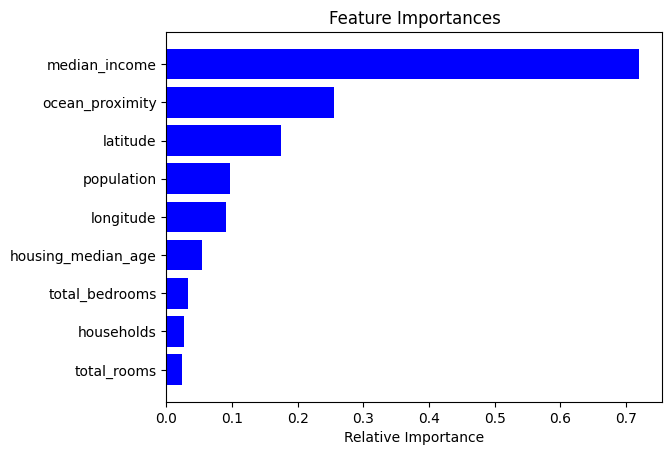

In [7]:
feature_importances_plot(rf, X_test, y_test)

K - Nearest Neighbor

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(score)

cross_list = list(evaluate_models_results(knn, X_test, y_test))
cross_list.insert(0, [score])
cross_list.insert(0, ["KNN"])
evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))

0.7599428558648691


<ipython-input-8-9310dc1f2843>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))


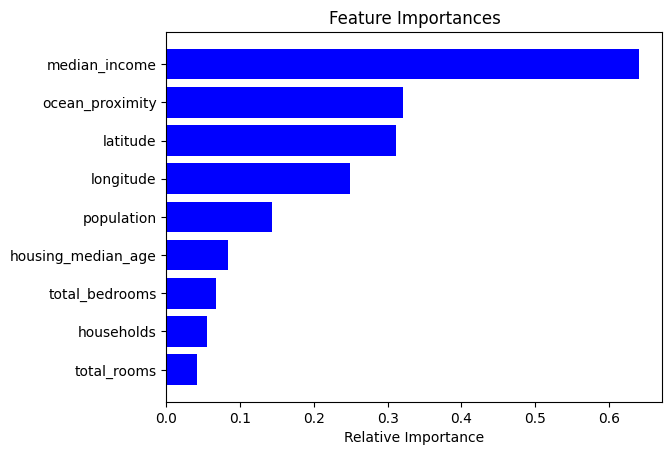

In [9]:
feature_importances_plot(knn, X_test, y_test)

Gradient Boost

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(criterion="squared_error", random_state=42)

gb.fit(X_train, y_train)
score = gb.score(X_test, y_test)
print(score)

cross_list = list(evaluate_models_results(gb, X_test, y_test))
cross_list.insert(0, [score])
cross_list.insert(0, ["Gradient Boost"])
evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))

0.7541248910797503


<ipython-input-10-669816ca8390>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))


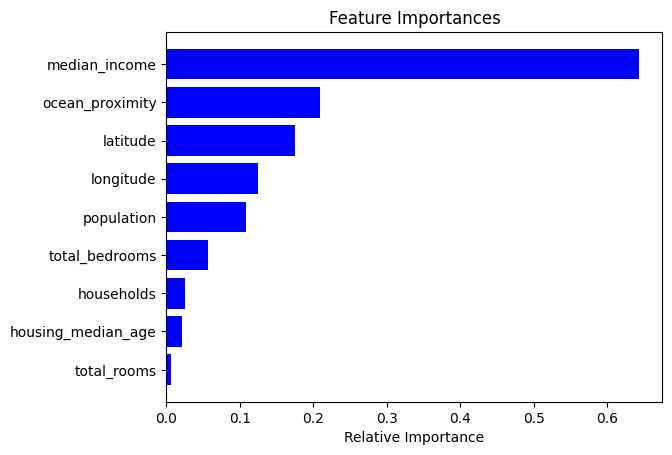

In [11]:
feature_importances_plot(gb, X_test, y_test)

SVR

In [12]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)
score = svr.score(X_test, y_test)
print(score)

cross_list = list(evaluate_models_results(svr, X_test, y_test))
cross_list.insert(0, [score])
cross_list.insert(0, ["SVR"])
evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))

0.809150800563319


<ipython-input-12-ad74211e6ecd>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))


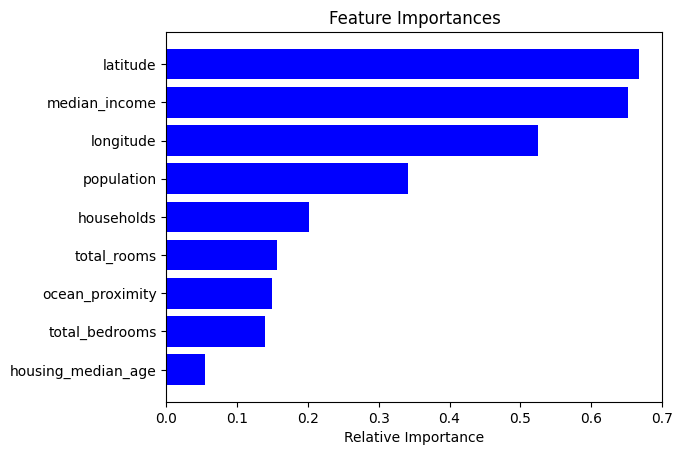

In [13]:
feature_importances_plot(svr, X_test, y_test)

Bayesian Linear Regression

In [14]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge(n_iter=150)

br.fit(X_train, y_train)
score = br.score(X_test, y_test)
print(score)

cross_list = list(evaluate_models_results(br, X_test, y_test))
cross_list.insert(0, [score])
cross_list.insert(0, ["BayeSian Ridge"])
evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))

0.6998040298695929


<ipython-input-14-4f7d4451996b>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluations = evaluations.append(pd.DataFrame([[val for sublist in cross_list for val in sublist]], columns=evals))


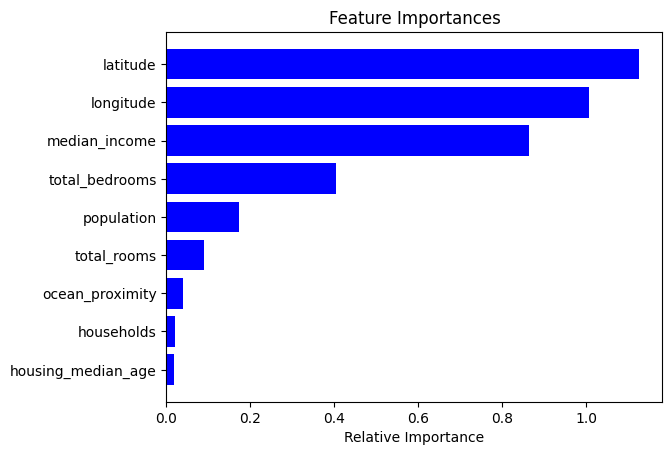

In [15]:
feature_importances_plot(br, X_test, y_test)

In [16]:
evaluations

,algorithm,score,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAE_result,RMSE_result
0,Random Forest,0.781329,0.219462,0.011174,0.292462,0.017236,"[0.22788931222087352, 0.219004548310967, 0.214...","[0.3001966158320252, 0.29123750541607035, 0.27..."
0,KNN,0.759943,0.231287,0.010049,0.308708,0.017587,"[0.2419266694647674, 0.2264157526127508, 0.225...","[0.32424982898001764, 0.3052335321880212, 0.29..."
0,Gradient Boost,0.754125,0.223292,0.012531,0.295010,0.018655,"[0.22760647616355792, 0.21373678447456168, 0.2...","[0.2985693571692516, 0.2870832207161712, 0.279..."
0,SVR,0.809151,0.193521,0.008794,0.263146,0.017451,"[0.20109404932228803, 0.1910976416210058, 0.18...","[0.2735413304007998, 0.2584135626050192, 0.251..."
0,BayeSian Ridge,0.699804,0.239375,0.014156,0.312003,0.017336,"[0.24654402610973014, 0.23753551827002223, 0.2...","[0.3211525177178926, 0.31004534137611073, 0.30..."
